<a href="https://colab.research.google.com/github/Nithish003/GitPythonDemo/blob/master/FSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load the Data
from google.colab import files
uploaded = files.upload()

Saving FB_stock_price.csv to FB_stock_price.csv


In [3]:
df =pd.read_csv('FB_stock_price.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,6/26/2019,189.539993,190.759995,187.309998,187.660004,187.660004,12808600
1,6/27/2019,189.880005,198.880005,188.270004,189.500000,189.500000,11159000
2,6/28/2019,190.550003,193.199997,189.940002,193.000000,193.000000,16378900
3,7/1/2019,195.210007,195.279999,191.929993,193.000000,193.000000,14204700
4,7/2/2019,193.000000,195.000000,192.710007,195.000000,195.000000,9050000
...,...,...,...,...,...,...,...
249,6/22/2020,238.559998,240.699997,236.910004,239.220001,239.220001,18917800
250,6/23/2020,241.279999,245.190002,239.860001,242.240005,242.240005,24017900
251,6/24/2020,241.199997,243.220001,232.679993,234.020004,234.020004,20834900
252,6/25/2020,234.619995,237.300003,232.740005,235.679993,235.679993,18621900


In [4]:
df.shape

(254, 7)

In [6]:
actual_price = df.tail(1)
actual_price

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
253,6/26/2020,232.639999,233.089996,215.399994,216.080002,216.080002,72231164


In [7]:
# prepare the data for training SVR Models
df = df.head(len(df)-1)
print(df)

          Date  Open Price  High Price  ...  Close Price  Adj Close Price    Volume
0    6/26/2019  189.539993  190.759995  ...   187.660004       187.660004  12808600
1    6/27/2019  189.880005  198.880005  ...   189.500000       189.500000  11159000
2    6/28/2019  190.550003  193.199997  ...   193.000000       193.000000  16378900
3     7/1/2019  195.210007  195.279999  ...   193.000000       193.000000  14204700
4     7/2/2019  193.000000  195.000000  ...   195.000000       195.000000   9050000
..         ...         ...         ...  ...          ...              ...       ...
248  6/19/2020  237.789993  240.830002  ...   238.789993       238.789993  30081300
249  6/22/2020  238.559998  240.699997  ...   239.220001       239.220001  18917800
250  6/23/2020  241.279999  245.190002  ...   242.240005       242.240005  24017900
251  6/24/2020  241.199997  243.220001  ...   234.020004       234.020004  20834900
252  6/25/2020  234.619995  237.300003  ...   235.679993       235.679993  1

In [9]:
# Create empty list tp store the independent and dependent data
days = list()
adj_close_prices =list()

In [11]:
# get the dates and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:,'Adj Close Price']

In [15]:
# crete the independent data set
for day in df_days:
  days.append( [int(day.split('/')[1])] )
 
# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [17]:
#print the days and the adj close prices
print(days)
print(adj_close_prices)

[[26], [27], [28], [1], [2], [3], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [31], [1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29], [30], [31], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [29], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [26], [27], [30], [31], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [21], [22], [23], [24], [27], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [18], [19], [20], [21], [24], [25], [26], [27], [28], [2], [3], [4], [5], [

In [24]:
#Create the 3 suport vector Regression Models
#Create and train a SVR model using a linear kernal
lin_svr =SVR(kernel='linear',C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a ploynomial kernal
poly_svr =SVR(kernel='poly',C=1000.0,degree =2)
poly_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a rbf kernal
rbf_svr =SVR(kernel='rbf',C=1000.0, gamma =0.15)
rbf_svr.fit(days,adj_close_prices)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

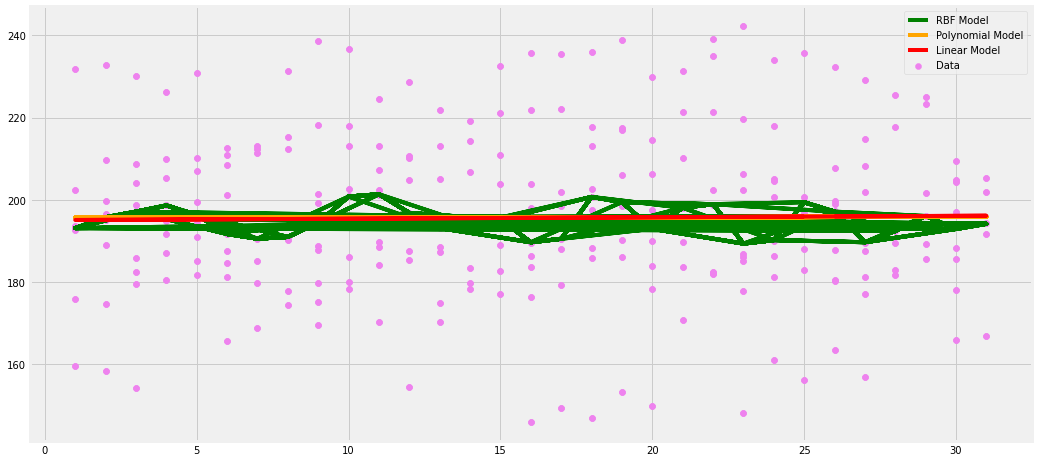

In [25]:
#plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'violet',label = 'Data')
plt.plot(days, rbf_svr.predict(days), color ='green',label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color ='orange',label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color ='red',label = 'Linear Model')
plt.legend()
plt.show()

In [28]:
#show the predicted price for a given day
day =[[26]]

print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [197.10010578]
The Linear SVR predicted: [195.93555733]
The Polynomial SVR predicted: [195.79232907]


In [33]:
actual_price = df.tail(1)
actual_price
#print the actual price of the stock on day 26
print('The actual price:', actual_price)

The actual price:           Date  Open Price  High Price  ...  Close Price  Adj Close Price    Volume
252  6/25/2020  234.619995  237.300003  ...   235.679993       235.679993  18621900

[1 rows x 7 columns]
